In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_listings = pd.read_csv('./listings.csv')
np.shape(df_listings)

(3818, 92)

In [16]:
#Checking how many total hosts are there?

np.shape(np.unique(df_listings['host_id']))


(2751,)

In [18]:
#How many superhosts are there?
def is_superhost(superhost):
    '''
    INPUT
        superhost - a string of one of the values from the host is a superhost column
    
    OUTPUT
        return 1 if the host is a superhost has value 't'
        return 0 otherwise
    
    '''
    if superhost in ['t']:
        return 1; 
    else:
        return 0
    

df_listings["host_is_superhost"].apply(is_superhost)[:5] #Test your function to assure it provides 1 and 0 values for the df

0    0
1    1
2    0
3    0
4    0
Name: host_is_superhost, dtype: int64

In [69]:
# Check how many superhosts
df_listings['Superhost?'] = df_listings["host_is_superhost"].apply(is_superhost)
superhost_perc = df_listings['Superhost?'].mean()
superhost_perc


0.2037716081718177

20% of hosts are superhosts

In [70]:
superhost = df_listings[df_listings['Superhost?'] == 1]  # Subset df to only those with HigherEd of 1
notsuperhost = df_listings[df_listings['Superhost?'] == 0]  # Subset df to only those with HigherEd of 0


print(superhost['Superhost?'][:5]) #Assure it looks like what you would expect
print(notsuperhost['Superhost?'][:5]) #Assure it looks like what you would expect

1     1
6     1
7     1
9     1
10    1
Name: Superhost?, dtype: int64
0    0
2    0
3    0
4    0
5    0
Name: Superhost?, dtype: int64


In [71]:
# Check for instant booking, cancellation policy and room type 
instant_booking = df_listings['instant_bookable'].value_counts()
instant_booking

f    3227
t     591
Name: instant_bookable, dtype: int64

In [110]:
#Check your subset is correct - you should get a plot that was created using pandas styling
#which you can learn more about here: https://pandas.pydata.org/pandas-docs/stable/style.html

def test_values_for_superhost(field_to_test) :
    ed_1_perc = superhost[field_to_test].value_counts().reset_index()
    ed_1_perc.rename(columns={'index': field_to_test, field_to_test: 'count'}, inplace=True)
    ed_1_perc.set_index(field_to_test,inplace=True)
    ed_1_perc = ed_1_perc/ed_1_perc.sum()
    ed_1_perc

    ed_0_perc = notsuperhost[field_to_test].value_counts().reset_index()
    ed_0_perc.rename(columns={'index': field_to_test, field_to_test: 'count'}, inplace=True)
    ed_0_perc.set_index(field_to_test,inplace=True)
    ed_0_perc = ed_0_perc/ed_0_perc.sum()

    comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
    comp_df.columns = [ 'superhost','nonsuperhost']

    comp_df['Diff_HigherEd_Vals'] = comp_df['superhost'] - comp_df['nonsuperhost']
    return comp_df  

In [109]:
#Instant Bookable
comp_df = test_values_for_superhost('instant_bookable')
comp_df.style.bar(subset=['Diff_HigherEd_Vals'])

In [111]:
#Room type 
comp_df = test_values_for_superhost('room_type')
comp_df.style.bar(subset=['Diff_HigherEd_Vals'])

In [112]:
#Cancellation policy
comp_df = test_values_for_superhost('cancellation_policy')
comp_df.style.bar(subset=['Diff_HigherEd_Vals'])

In [114]:
#Response time
comp_df = test_values_for_superhost('host_response_time')
comp_df.style.bar(subset=['Diff_HigherEd_Vals'])

In [15]:
df_new= df_listings[['review_scores_value', 'price','reviews_per_month']]

In [24]:
df_new.price = [x.strip('$') for x in df_new.price]
df_new.price = [x.replace(',','') for x in df_new.price]
df_new.price = [x.strip('.00') for x in df_new.price]
df_new.price = df_new.price.astype(float)
df_new.price

0        85
1        15
2       975
3         1
4        45
5        12
6         8
7         6
8         9
9        15
10       95
11       99
12      245
13      165
14      461
15      109
16       66
17       99
18        2
19        7
20       11
21       99
22       45
23       75
24        6
25       45
26       15
27       45
28        3
29        8
       ... 
3788    115
3789      6
3790    175
3791     85
3792    109
3793    109
3794    107
3795      2
3796     85
3797      7
3798     77
3799     65
3800    185
3801    108
3802      2
3803     25
3804    125
3805      1
3806     16
3807    109
3808    175
3809     12
3810    154
3811     65
3812     95
3813    359
3814     79
3815     93
3816     99
3817     87
Name: price, dtype: float64

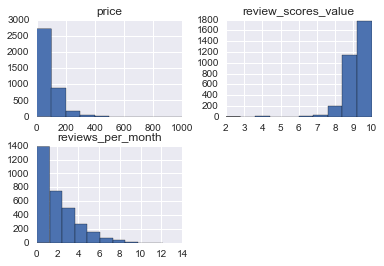

In [25]:
df_new.hist();

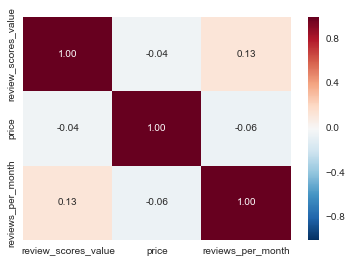

In [26]:
sns.heatmap(df_new.corr(), annot=True, fmt=".2f");